In [6]:
require(rstan)
require(plyr)
require(ggplot2)
require(reshape2)

Loading required package: reshape2


### Sample from prior

The very small sigma_sq value is necessary to avoid an error.  Don't set it to zero.

In [3]:
gp_sim = "
data {
    int<lower=1> N;
    real x[N];
    real eta_sq;
    real rho_sq;
    real sigma_sq;
}
transformed data {
    vector[N] mu;
    cov_matrix[N] Sigma;
    for (i in 1:N) 
        mu[i] <- 0;
    for (i in 1:N) 
        for (j in 1:N)
            Sigma[i,j] <- eta_sq * exp(-rho_sq*pow(x[i] - x[j],2)) + if_else(i==j, sigma_sq, 0.0);
}
parameters {
    vector[N] y;
}
model {
    y ~ multi_normal(mu,Sigma);
}
"

In [4]:
x <- seq(-5, 5, 0.2)
n <- length(x)
fit <- stan(model_code=gp_sim, data=list(x=x, N=n, eta_sq=1, rho_sq=0.5, sigma_sq=0.0001),
            iter=200, chains=3)
sims <- extract(fit, permuted=TRUE)


SAMPLING FOR MODEL 'd9487cd1ccbbffec2f328757aed6fc0c' NOW (CHAIN 1).

Chain 1, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 1, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 1, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain 1, Iteration:  60 / 200 [ 30%]  (Warmup)
Chain 1, Iteration:  80 / 200 [ 40%]  (Warmup)
Chain 1, Iteration: 100 / 200 [ 50%]  (Warmup)
Chain 1, Iteration: 101 / 200 [ 50%]  (Sampling)
Chain 1, Iteration: 120 / 200 [ 60%]  (Sampling)
Chain 1, Iteration: 140 / 200 [ 70%]  (Sampling)
Chain 1, Iteration: 160 / 200 [ 80%]  (Sampling)
Chain 1, Iteration: 180 / 200 [ 90%]  (Sampling)
Chain 1, Iteration: 200 / 200 [100%]  (Sampling)# 
#  Elapsed Time: 1.21814 seconds (Warm-up)
#                0.943088 seconds (Sampling)
#                2.16122 seconds (Total)
# 

SAMPLING FOR MODEL 'd9487cd1ccbbffec2f328757aed6fc0c' NOW (CHAIN 2).

Chain 2, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 2, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 2, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain 2

Using X1 as id variables


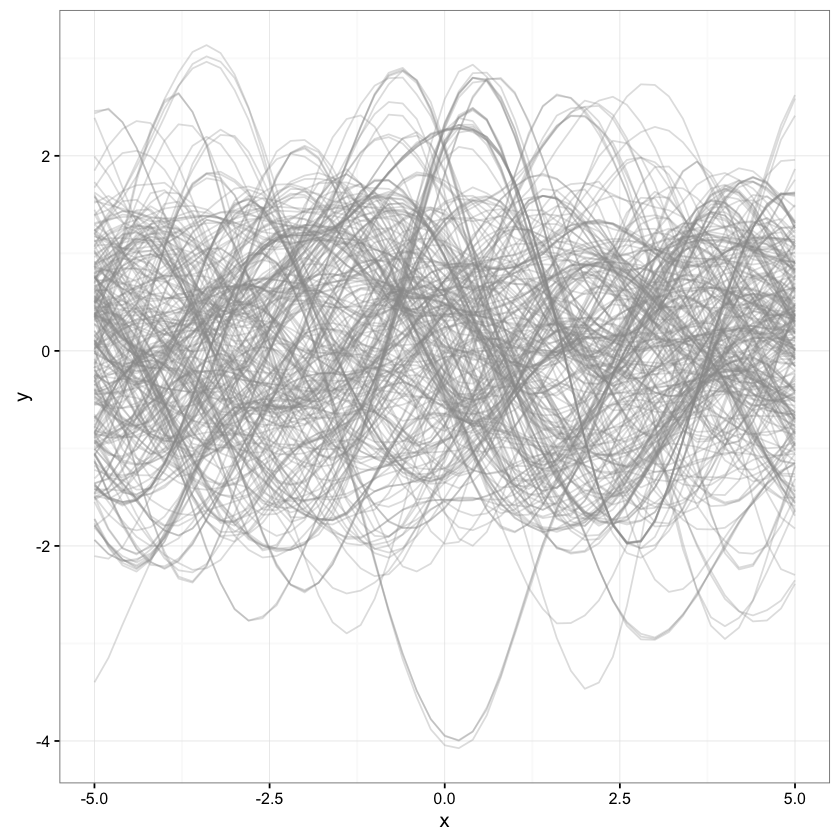

In [8]:
data <- adply(sims$y, 2)
tmp <- melt(data)
names(tmp) <- c("xid", "group", "y")
tmp <- mutate(tmp, x=x[xid])
fig2a <- ggplot(tmp, aes(x=x, y=y)) +
    geom_line(aes(group=group), colour="#999999", alpha=0.3) + theme_bw()
fig2a

### Observe noise-free data points.

In [9]:
x1 <- c(-4, -3, -1, 0, 2)
y1 <- c(-2, 0, 1, 2, -1)

In [10]:
gp_predict = "
data {
    int<lower=1> N1;
    vector[N1] x1;
    vector[N1] y1;
    int<lower=1> N2;
    vector[N2] x2;
    real sigma_sq;
    real eta_sq;
    real rho_sq;
}
transformed data {
    int<lower=1> N;
    vector[N1+N2] x;
    vector[N1+N2] mu;
    cov_matrix[N1+N2] Sigma;
    
    N <- N1 + N2;
    for (n in 1:N1) x[n] <- x1[n];
    for (n in 1:N2) x[N1 + n] <- x2[n];
    for (i in 1:N) mu[i] <- 0;
    for (i in 1:N)
        for (j in 1:N)
            Sigma[i,j] <- eta_sq*exp(-rho_sq*pow(x[i] - x[j],2)) + if_else(i==j, sigma_sq, 0.0);
}
parameters {
    vector[N2] y2;
}
model {
    vector[N] y;
    for (n in 1:N1) y[n] <- y1[n];
    for (n in 1:N2) y[N1 + n] <- y2[n];

    y ~ multi_normal(mu,Sigma);
}
"

In [11]:
fit <- stan(model_code=gp_predict, data=list(x1=x1, y1=y1, N1=length(x1), 
                                      x2=x, N2=length(x), eta_sq=1, rho_sq=0.5, sigma_sq=0.0001),
            iter=200, chains=3)
sims <- extract(fit, permuted=TRUE)


SAMPLING FOR MODEL '5dde756ad54f2ae423dc09d76d9ce7d1' NOW (CHAIN 1).

Chain 1, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 1, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 1, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain 1, Iteration:  60 / 200 [ 30%]  (Warmup)
Chain 1, Iteration:  80 / 200 [ 40%]  (Warmup)
Chain 1, Iteration: 100 / 200 [ 50%]  (Warmup)
Chain 1, Iteration: 101 / 200 [ 50%]  (Sampling)
Chain 1, Iteration: 120 / 200 [ 60%]  (Sampling)
Chain 1, Iteration: 140 / 200 [ 70%]  (Sampling)
Chain 1, Iteration: 160 / 200 [ 80%]  (Sampling)
Chain 1, Iteration: 180 / 200 [ 90%]  (Sampling)
Chain 1, Iteration: 200 / 200 [100%]  (Sampling)# 
#  Elapsed Time: 0.634096 seconds (Warm-up)
#                0.186614 seconds (Sampling)
#                0.82071 seconds (Total)
# 

SAMPLING FOR MODEL '5dde756ad54f2ae423dc09d76d9ce7d1' NOW (CHAIN 2).

Chain 2, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 2, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 2, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain 

Using X1 as id variables


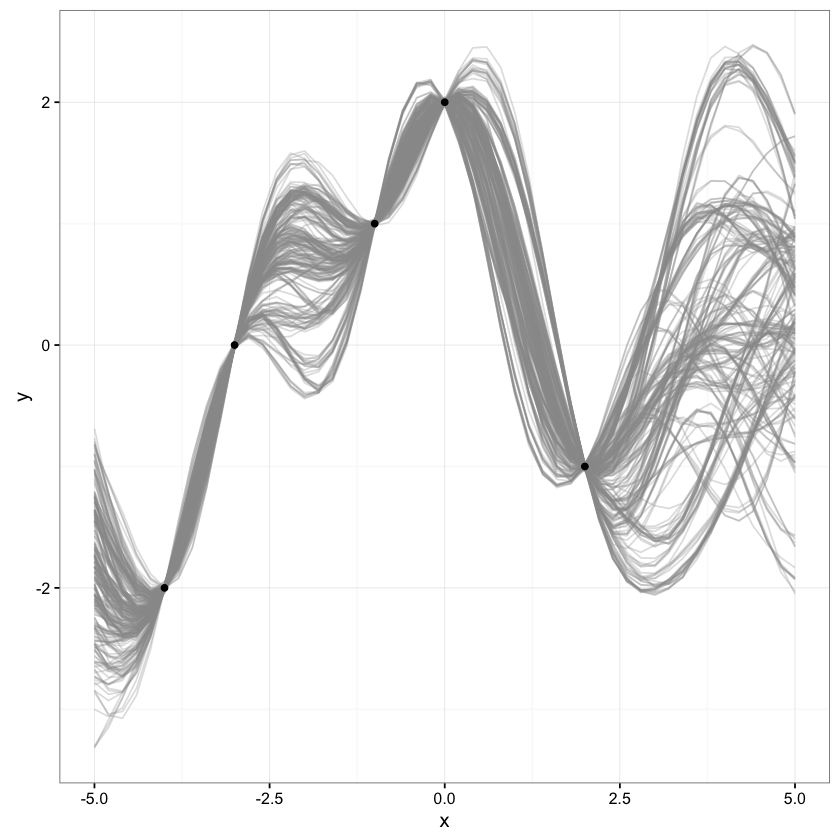

In [12]:
data <- adply(sims$y, 2)
tmp <- melt(data)
names(tmp) <- c("xid", "group", "y")
tmp <- mutate(tmp, x=x[xid])
fig2b <- ggplot(tmp, aes(x=x, y=y)) +
  geom_line(aes(group=group), colour="#999999", alpha=0.3) +
  theme_bw() +
  geom_point(data=data.frame(x=x1, y=y1))
fig2b

### Add observation noise

In [13]:
sigma.n <- 0.1
fit <- stan(model_code=gp_predict, data=list(x1=x1, y1=y1, N1=length(x1), 
                                      x2=x, N2=length(x), eta_sq=1, rho_sq=1, sigma_sq=sigma.n^2),
            iter=200, chains=3)
sims <- extract(fit, permuted=TRUE)


SAMPLING FOR MODEL '5dde756ad54f2ae423dc09d76d9ce7d1' NOW (CHAIN 1).

Chain 1, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 1, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 1, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain 1, Iteration:  60 / 200 [ 30%]  (Warmup)
Chain 1, Iteration:  80 / 200 [ 40%]  (Warmup)
Chain 1, Iteration: 100 / 200 [ 50%]  (Warmup)
Chain 1, Iteration: 101 / 200 [ 50%]  (Sampling)
Chain 1, Iteration: 120 / 200 [ 60%]  (Sampling)
Chain 1, Iteration: 140 / 200 [ 70%]  (Sampling)
Chain 1, Iteration: 160 / 200 [ 80%]  (Sampling)
Chain 1, Iteration: 180 / 200 [ 90%]  (Sampling)
Chain 1, Iteration: 200 / 200 [100%]  (Sampling)# 
#  Elapsed Time: 0.145775 seconds (Warm-up)
#                0.064852 seconds (Sampling)
#                0.210627 seconds (Total)
# 

SAMPLING FOR MODEL '5dde756ad54f2ae423dc09d76d9ce7d1' NOW (CHAIN 2).

Chain 2, Iteration:   1 / 200 [  0%]  (Warmup)
Chain 2, Iteration:  20 / 200 [ 10%]  (Warmup)
Chain 2, Iteration:  40 / 200 [ 20%]  (Warmup)
Chain

Using X1 as id variables


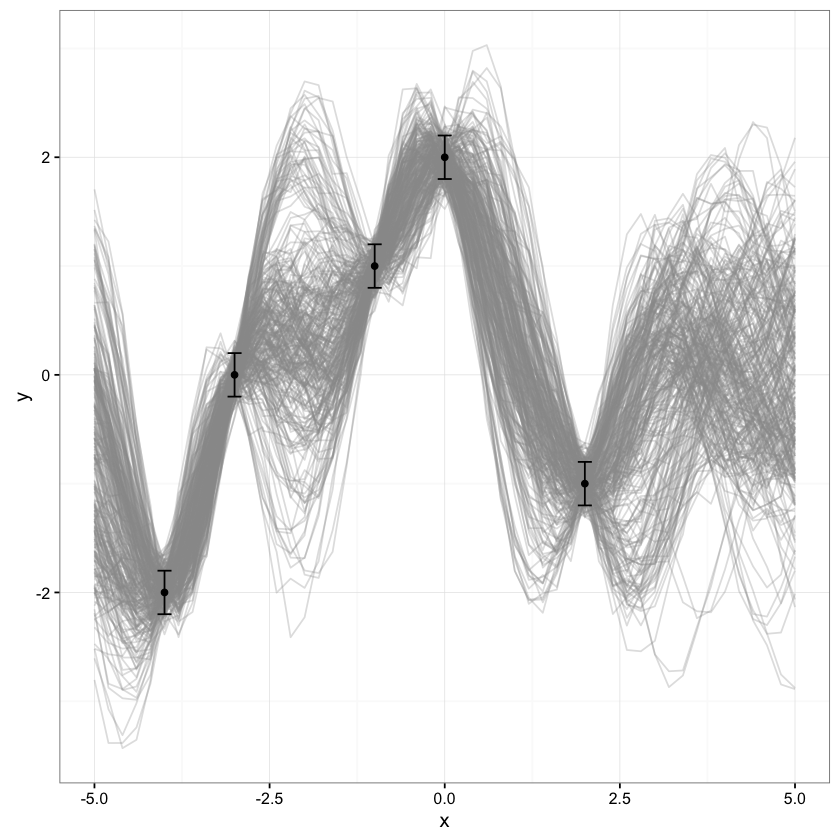

In [14]:
data <- adply(sims$y, 2)
tmp <- melt(data)
names(tmp) <- c("xid", "group", "y")
tmp <- mutate(tmp, x=x[xid])
fig2c <- ggplot(tmp, aes(x=x, y=y)) +
  geom_line(aes(group=group), colour="#999999", alpha=0.3) +
  theme_bw() +
  geom_point(data=data.frame(x=x1, y=y1)) +
  geom_errorbar(data=data.frame(x=x1, y=y1), aes(x=x,y=NULL,ymin=y-2*sigma.n, ymax=y+2*sigma.n), width=0.2) 
fig2c